<a href="https://colab.research.google.com/github/idhamari/sim_synth_data/blob/main/2b_Time_series_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import statsmodels.api as sm
import numpy as np
!pip install hmmlearn
from hmmlearn import hmm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Simulating from a statsmodels ARIMA model

## Exercise: simulate from an ARMA model
### hint (see statsmodels.api.tsa)

In [4]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)

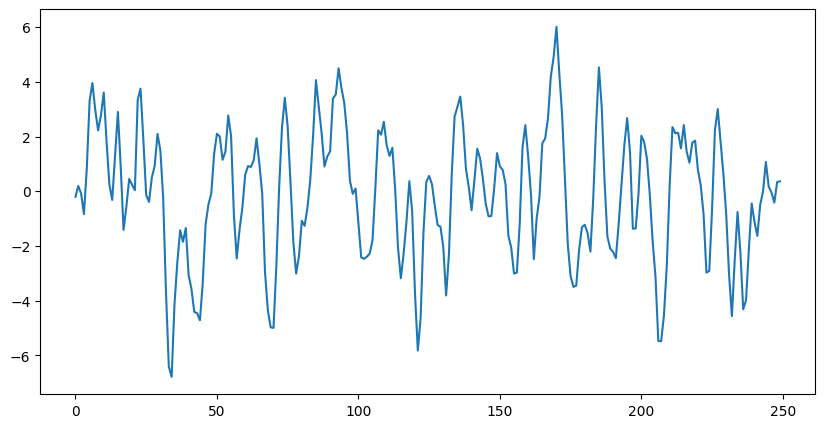

In [5]:
plt.plot(y)

## Simulating a hidden markov model from hmmlearn

In [6]:
startprob = np.array([0.5, 0.3, 0.2])

transmat  = np.array([[0.7, 0.2, 0.1],
                      [0.3, 0.5, 0.2],
                      [0.1, 0.1, 0.8]])
mus       = np.array([[0.0,  0.0],
                      [9.0, 10.0],
                      [11.0, -1.0]])

## must have shape (n_components, n_dim, n_dim)
sigma = np.dstack([np.array([[1.0, 0.9],[0.9, 1.0]]),
                  np.array([[1.0, -0.5],[-0.5, 1.0]]), 
                  np.array([[1.0, 0.0],[0.0, 1.0]])])
sigma = np.transpose(sigma, [2, 0, 1])

# create a GaussianHMM object
model = hmm.GaussianHMM(n_components = 3, covariance_type = "full")

# set parameters directly rather than fitting to data
model.startprob_ = startprob
model.transmat_  = transmat
model.means_     = mus
model.covars_    = sigma

# generate ordered samples
X, Z = model.sample(500)

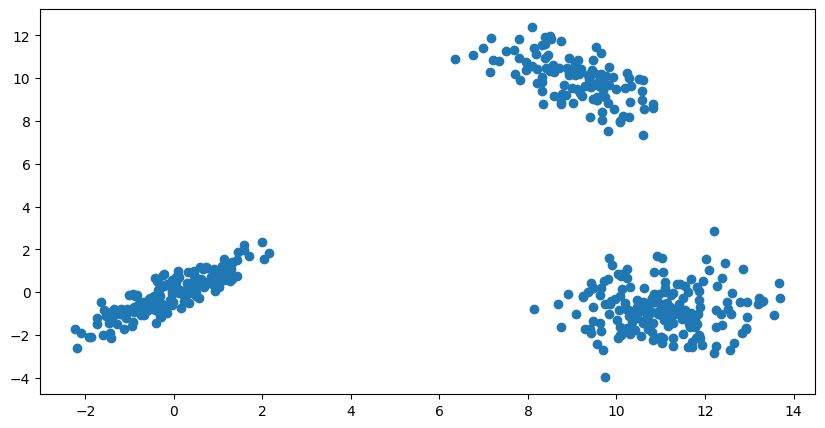

In [7]:
plt.scatter(X[:, 0], X[:, 1])

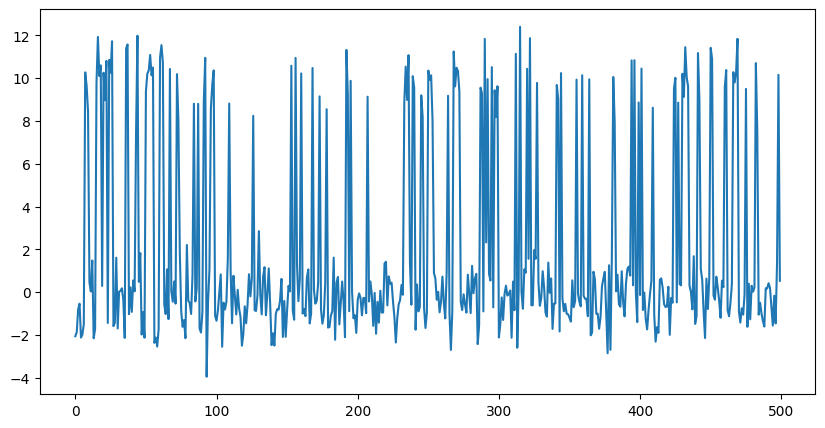

In [8]:
plt.plot(X[:, 1])

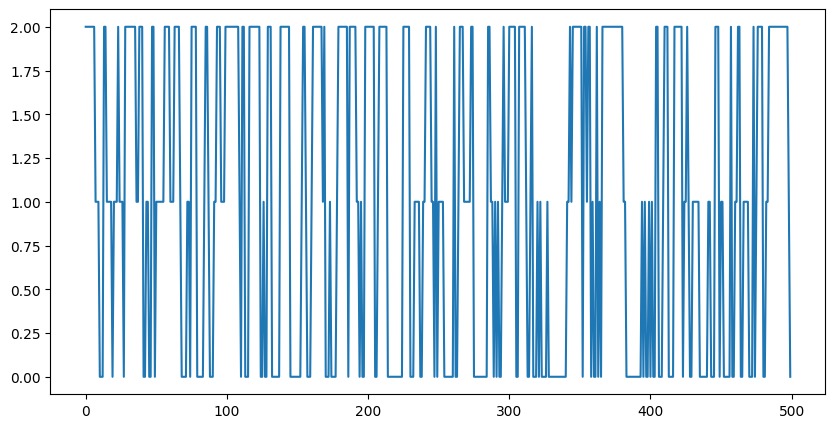

In [9]:
plt.plot(Z)

## source code
#### https://github.com/hmmlearn/hmmlearn/blob/master/lib/hmmlearn/base.py (sample)
#### https://github.com/hmmlearn/hmmlearn/blob/master/lib/hmmlearn/hmm.py (_generate_sample_from_state)